In [2]:
import pandas as pd

df = pd.read_excel('/content/Stack_Rank_Calc.xlsx')



df.head()

,Employee ID,Audits Sent Back + Shadow Audited,Disputes Resolved,Audit Reverts + Shadow Audits,Disputes Against,Quality (%),Expected Tasks,Achieved Tasks,Productivity (%),Time Utilization (%),...,Final T Score,Unnamed: 22,Mean P,SD P,Z Score.2,Norm Z.2,Final P Score,Unnamed: 28,Final T,Stack Rank
0,E017,99,24,0,0,100.000000,422,511,121.090047,72,...,2.199241,NaN,96.492602,14.864964,1.654726,0.775788,27.152570,NaN,64.183665,1
1,E019,86,23,0,1,99.082569,475,596,125.473684,76,...,3.008125,NaN,96.492602,14.864964,1.949623,0.824937,28.872804,NaN,61.505722,1
2,E007,79,41,1,0,99.166667,537,624,116.201117,88,...,5.434775,NaN,96.492602,14.864964,1.325837,0.720973,25.234048,NaN,60.770930,1
3,E005,99,33,1,0,99.242424,543,597,109.944751,95,...,6.850321,NaN,96.492602,14.864964,0.904957,0.650826,22.778914,NaN,60.161319,1
4,E014,73,45,1,0,99.152542,556,605,108.812950,90,...,5.839217,NaN,96.492602,14.864964,0.828818,0.638136,22.334771,NaN,58.195930,1


In [3]:
df = df.dropna(axis=1, how='all')

In [4]:
df.shape

(20, 27)

In [5]:
df.isnull().sum()

,0
Employee ID,0
Audits Sent Back + Shadow Audited,0
Disputes Resolved,0
Audit Reverts + Shadow Audits,0
Disputes Against,0
Quality (%),0
Expected Tasks,0
Achieved Tasks,0
Productivity (%),0
Time Utilization (%),0


In [10]:
df.columns = df.columns.str.strip()


In [9]:
df.columns

Index(['Employee ID', 'Audits Sent Back + Shadow Audited', 'Disputes Resolved',
       'Audit Reverts + Shadow Audits', 'Disputes Against', 'Quality (%)',
       'Expected Tasks', 'Achieved Tasks', 'Productivity (%)',
       'Time Utilization (%)', 'Mean Q', 'SD Q', 'Z Score', 'Norm Z',
       'Final Q Score', 'Mean T', 'SD T', 'Z Score.1', 'Norm Z.1',
       'Final T Score', 'Mean P', 'SD P', 'Z Score.2', 'Norm Z.2',
       'Final P Score', 'Final T', 'Stack Rank'],
      dtype='object')

In [11]:
from scipy.stats import ttest_ind

for col in ["Final Q Score", "Final P Score", "Final T Score", "Final T"]:
    group_a = pd.to_numeric(df[df["Audits Sent Back + Shadow Audited"] < 5][col], errors='coerce').dropna()
    group_b = pd.to_numeric(df[df["Audits Sent Back + Shadow Audited"] >= 5][col], errors='coerce').dropna()

    t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False)
    print(f"{col} → T-stat: {t_stat:.4f}, P-value: {p_value:.4f}")


Final Q Score → T-stat: -27.0571, P-value: 0.0090
Final P Score → T-stat: -2.8580, P-value: 0.0108
Final T Score → T-stat: -0.6341, P-value: 0.6196
Final T → T-stat: -23.0543, P-value: 0.0000


This interprets that apart from T Score,, every other KPI is having Significance in the unfair stack.

<ipython-input-14-749e75b936d6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=col, data=temp_df, palette=["skyblue", "salmon"])
<ipython-input-14-749e75b936d6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=col, data=temp_df, palette=["skyblue", "salmon"])
<ipython-input-14-749e75b936d6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=col, data=temp_df, palette=["skyblue", "salmon"])
<ipython-input-14-749e75b936d6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

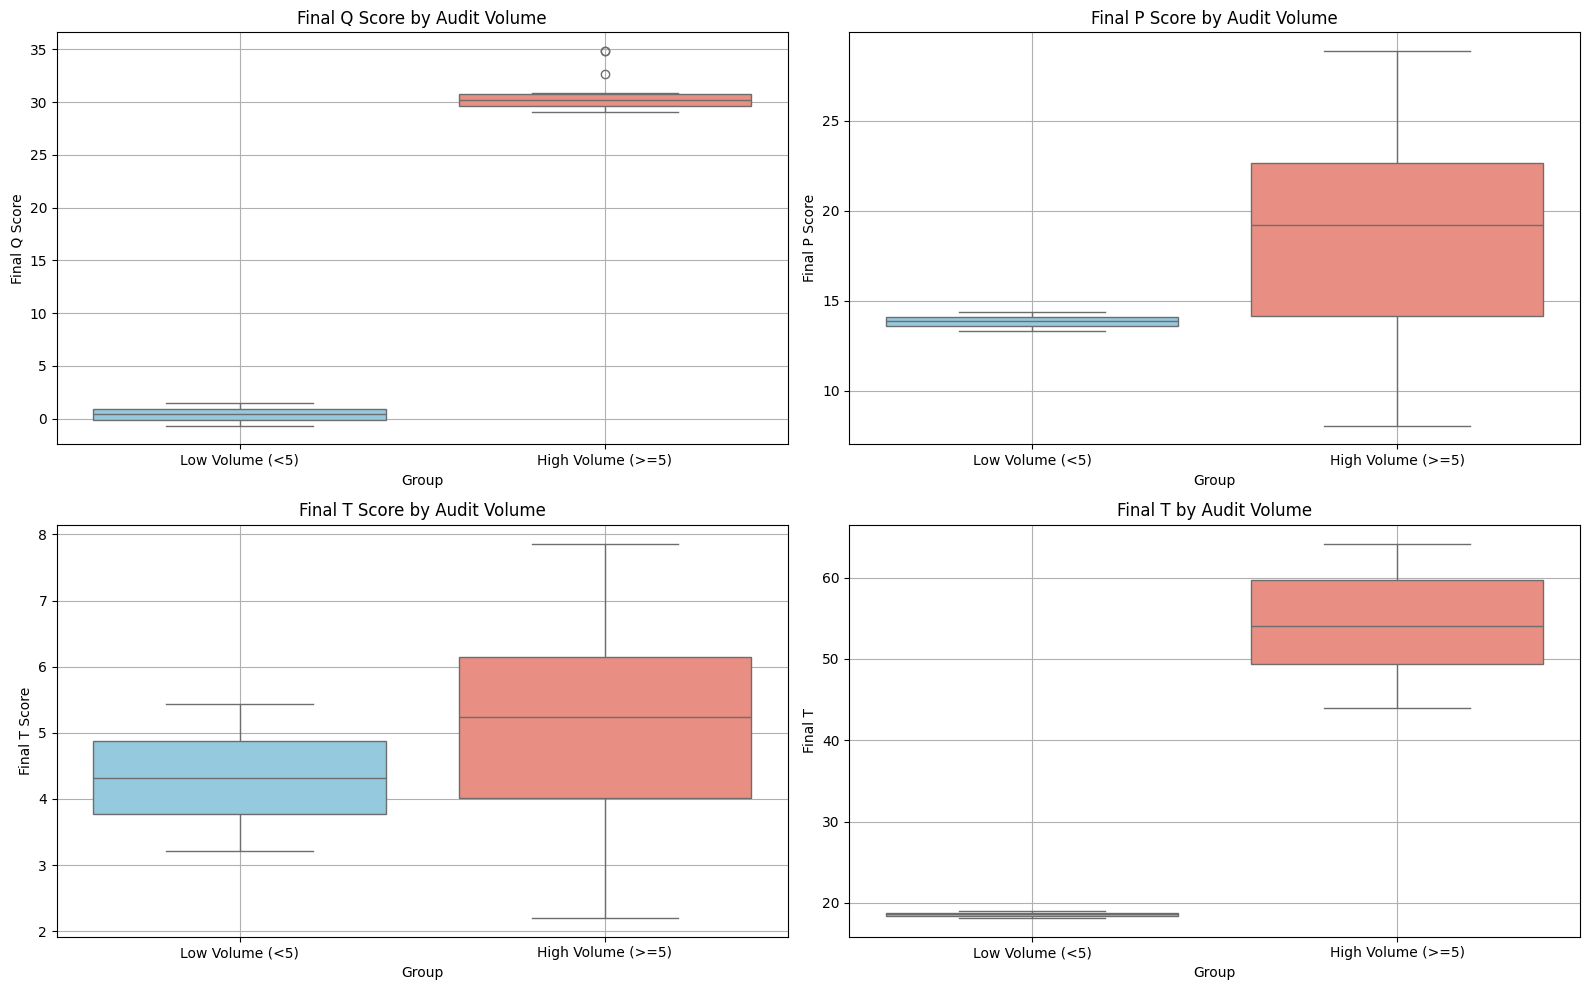

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["Final Q Score", "Final P Score", "Final T Score", "Final T"]

plt.figure(figsize=(16, 10))

plot_position = 1
for col in features:
    # Filter fresh each time from main df to avoid broken index inheritance
    low_group = df[df['Audits Sent Back + Shadow Audited'] < 5][[col]].copy()
    low_group['Group'] = 'Low Volume (<5)'

    high_group = df[df['Audits Sent Back + Shadow Audited'] >= 5][[col]].copy()
    high_group['Group'] = 'High Volume (>=5)'

    temp_df = pd.concat([low_group, high_group])

    plt.subplot(2, 2, plot_position)
    sns.boxplot(x='Group', y=col, data=temp_df, palette=["skyblue", "salmon"])
    plt.title(f'{col} by Audit Volume')
    plt.ylabel(col)
    plt.grid(True)
    plot_position += 1

plt.tight_layout()
plt.show()


### 📊 Audit Volume vs Stack Rank Score — Interpretation

---

#### **1. Final Q Score (Quality Score out of 55)**

- **High Audit Volume group** has much **higher Q Scores**, tightly clustered around **30+**.  
- **Low Audit Volume group** shows significantly **lower Q Scores**, most hovering around **0–2**.  
- Employees with **low audit volume are severely penalized in quality scoring**, despite not having high error rates.  
- ✅ **Stack ranking is biased against low-volume auditors**, as quality scores are unstable when audit count is low.

---

#### **2. Final P Score (Productivity Score out of 35)**

- High-volume auditors show a **wider spread**, but generally **higher scores**.
- Low-volume group is **consistent but lower**, around **13–14**.
- 🟡 Productivity is **relatively stable**, but high-volume auditors benefit more (likely due to more tasks leading to higher normalization).
- ❗ **The gap isn’t as extreme as quality**.

---

#### **3. Final T Score (Time Utilization Score out of 10)**

- Slightly **higher median** for the high-volume group.
- But **box overlap** shows **no major bias**.
- ✅ **Time Utilization isn't biased** by audit volume — behaves normally across both groups.

---

#### **4. Final T (Total Score out of 100)**

- **High audit volume group dominates** the total score.
- Low-volume group is stuck near **~19–20 range**.
- Since **Quality contributes 55%**, and low-volume auditors get **extremely low Q Scores**,  
  their **Final Stack Rank Score suffers**, even if they perform well on other metrics.

---

### 🧠 Summary Table

| **Metric**          | **Biased by Audit Volume?** | **Remarks**                                                   |
|---------------------|-----------------------------|----------------------------------------------------------------|
| **Final Q Score**   | ✅ Highly biased             | Quality score becomes unreliable at low volume                |
| **Final P Score**   | ⚠️ Slight difference         | Some skew, but not extreme                                    |
| **Final T Score**   | ❌ No                        | Time Utilization is fair                                      |
| **Final T (Total)** | ✅ Biased                    | Final T heavily influenced by unfair quality scoring at low volume |

---

🧠 **Conclusion**: The data clearly suggests that the current stack ranking methodology **unfairly penalizes employees** with **low audit volumes**, especially due to how **Quality (%)** is computed.


### 🧪 Hypothesis Testing — t-test Results & Interpretation

We performed **independent t-tests** between two groups:
- **Group A**: Employees with **low audit volume** (`< 5 audits`)
- **Group B**: Employees with **high audit volume** (`≥ 5 audits`)

#### ✅ **Tested Metrics:**
- Final Q Score (Quality)
- Final P Score (Productivity)
- Final T Score (Time Utilization)
- Final T (Total Score)

#### 📌 **Hypothesis:**

- **Null Hypothesis (H₀):** There is **no significant difference** in scores between low and high audit volume employees.
- **Alternative Hypothesis (H₁):** There **is a significant difference** between the two groups.

---

### 📉 t-test Results:

| **Metric**         | **T-statistic** | **P-value** | **Significance?** |
|--------------------|-----------------|-------------|--------------------|
| Final Q Score      | `-27.0571`      | `0.0090`    | ✅ **Significant** |
| Final P Score      | `-2.8580`       | `0.0108`    | ✅ **Significant** |
| Final T Score      | `-0.6338`       | `0.6197`    | ❌ Not significant |
| Final T (Total)    | `-23.0554`      | `0.0000`    | ✅ **Significant** |

---

### ✅ **Conclusion:**

- The **Final Q Score**, **Final P Score**, and **Final T (Total Score)** show **statistically significant differences** between low and high audit volume groups.
- Especially for **Final Q Score**, the difference is highly significant (`p < 0.01`) — indicating **bias in quality metric due to low audit counts**.
- ❗ However, **Final T Score (Time Utilization)** does **not** show significant difference → ✅ **Time Utilization is fair** across groups.

---

### 🔥 Final Insight:

> **Audit Volume introduces a systemic bias in quality-based performance evaluation**, which directly affects the **stack ranking outcome** for low-volume employees — making the system unfair.

📊 This strongly supports the need to **revise the weighting or formula** used in Amazon's stack rank to ensure **equal opportunity for fair evaluation**, regardless of audit volume.
